In [22]:
# import pandas library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# identify type of data in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before cleaning:")
print(missing_values)


Missing values before cleaning:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [10]:
# Replace non-numeric values in integer columns with 0.0
int_columns = ['yr_renovated', 'sqft_basement', 'bathrooms', 'price']
for column in int_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)

In [11]:
# Convert specified columns to appropriate types
df['zipcode'] = df['zipcode'].astype('object')
df['id'] = df['id'].astype('object')

In [12]:
# Convert date column to date types
df['date'] = pd.to_datetime(df['date'])

In [13]:
# Handle inconsistencies
categorical_columns = ['waterfront', 'view', 'condition', 'grade']
df[categorical_columns] = df[categorical_columns].astype('category')

In [14]:
# For other columns with missing values, fill numerical columns with the median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [15]:
# Fill categorical columns with the mode
for column in categorical_columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [16]:
# Verify that all missing values have been handled
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [17]:
# Identify and handle outliers in numerical columns using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numerical_columns:
    df = remove_outliers(df, column)

In [18]:
# Ensure consistency in categorical columns
def clean_categories(df, column):
    df[column] = df[column].str.strip().str.lower()
    df[column] = df[column].replace({
        'yes': 'Yes',
        'no': 'No'
    })
    return df

for column in categorical_columns:
    df = clean_categories(df, column)

In [19]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1,1180,5650,1.0,No,none,...,7 average,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2,2570,7242,2.0,No,none,...,7 average,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1,770,10000,1.0,No,none,...,6 low average,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3,1960,5000,1.0,No,none,...,7 average,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2,1680,8080,1.0,No,none,...,8 good,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000,3,2,1530,1131,3.0,No,none,...,8 good,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000,4,2,2310,5813,2.0,No,none,...,8 good,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101,2,0,1020,1350,2.0,No,none,...,7 average,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000,3,2,1600,2388,2.0,No,none,...,8 good,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [20]:
# Identify and handle invalid data entries
# Ensure sqft_living and price are positive
df = df[(df['sqft_living'] > 0) & (df['price'] > 0)]

In [25]:
# Correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.246738   0.362813     0.576411 -0.039261  0.231589   
bedrooms       0.246738  1.000000   0.396062     0.606109  0.208481  0.129046   
bathrooms      0.362813  0.396062   1.000000     0.592393 -0.090861  0.477421   
sqft_living    0.576411  0.606109   0.592393     1.000000  0.188205  0.304316   
sqft_lot      -0.039261  0.208481  -0.090861     0.188205  1.000000 -0.400161   
floors         0.231589  0.129046   0.477421     0.304316 -0.400161  1.000000   
sqft_above     0.437388  0.476640   0.529009     0.805657  0.137916  0.527931   
sqft_basement  0.294825  0.282352   0.183139     0.442388  0.104181 -0.286034   
yr_built      -0.053489  0.141123   0.443483     0.279807 -0.068857  0.494348   
yr_renovated   0.134129  0.015386   0.061077     0.053305 -0.011485  0.005141   
lat            0.423423 -0.061224  -0.008690     0.017136 -0.140177  0.025986   
long    

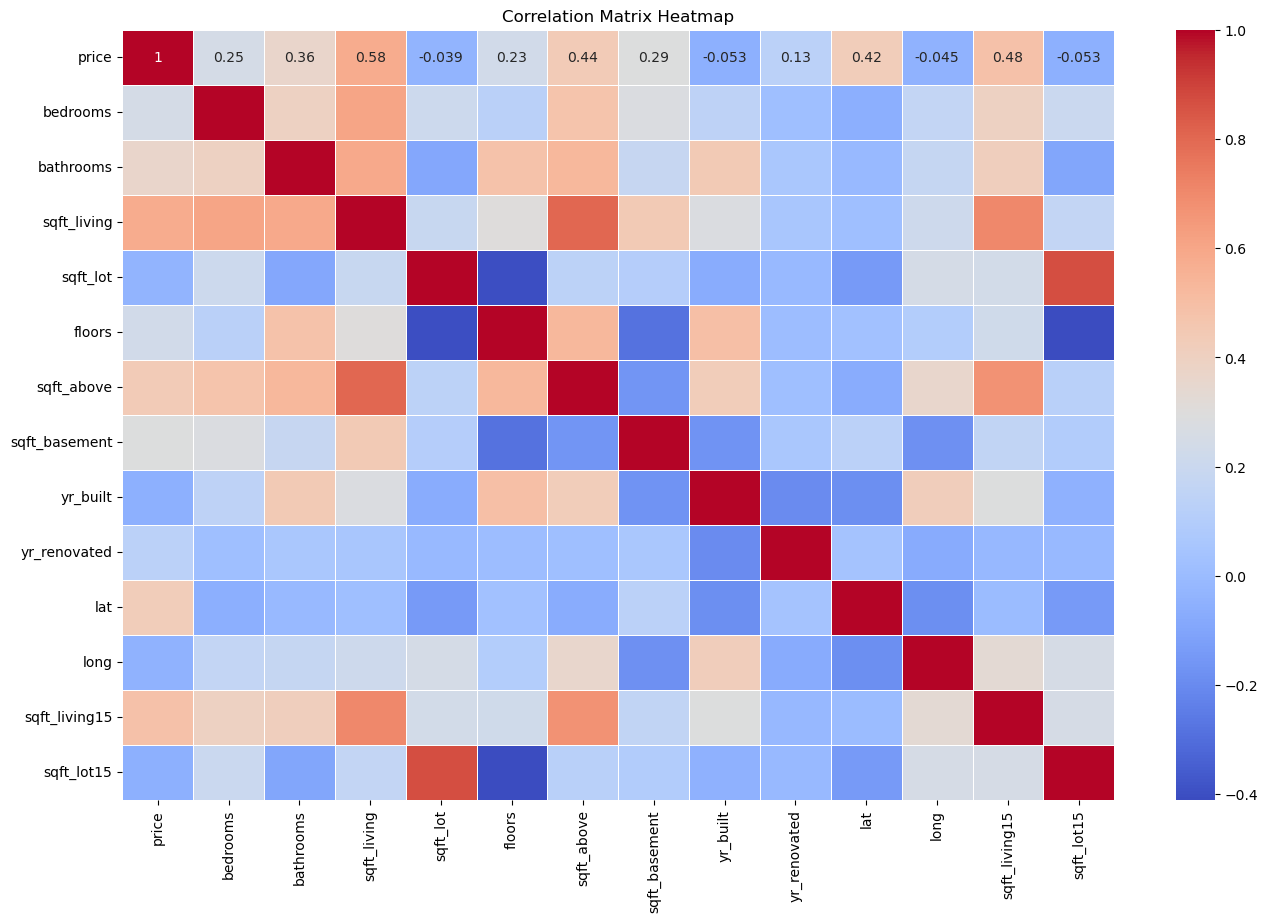

In [26]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
# Save the cleaned dataframe to a new CSV file
cleaned_file_path = './data/david_cleaned_kc_house_data.csv'
df.to_csv(cleaned_file_path, index=False)

In [28]:
# Group by `bedrooms` and calculate aggregate metrics
grouped_by_bedrooms = df.groupby('bedrooms').agg({
    'price': ['mean', 'median', 'max', 'min'],
    'sqft_living': ['mean', 'median'],
    'bathrooms': 'sum'
}).reset_index()
print("Aggregate metrics by bedrooms:")
print(grouped_by_bedrooms)

Aggregate metrics by bedrooms:
  bedrooms          price                             sqft_living          \
                     mean    median      max     min         mean  median   
0        2  398185.127455  376000.0  1700000   78000  1207.620040  1130.0   
1        3  441265.250914  399700.0  2260000   82000  1707.503534  1630.0   
2        4  545655.495178  490000.0  2750000  100000  2288.705963  2240.0   
3        5  588766.167155  530000.0  2050000  133000  2567.626588  2560.0   

  bathrooms  
        sum  
0      3014  
1     12880  
2      9601  
3      2164  


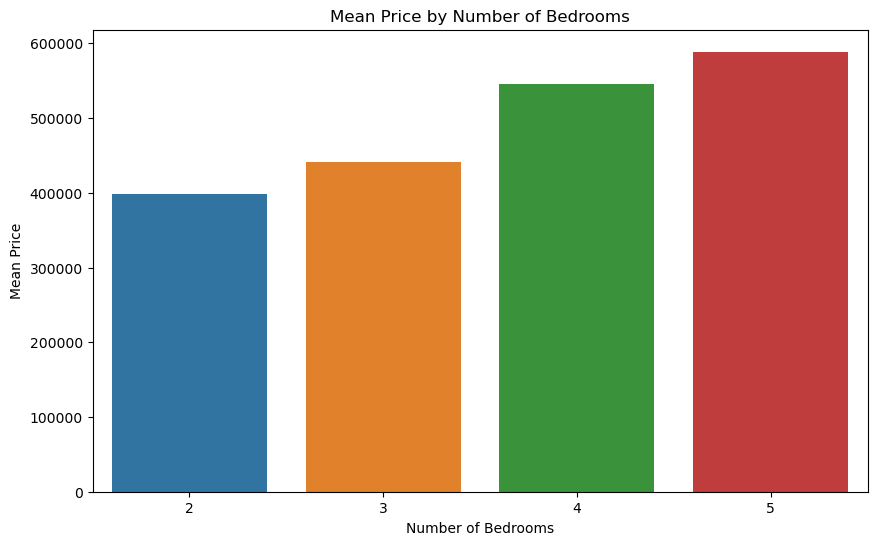

In [29]:
# Plotting the results
grouped_by_bedrooms.columns = ['bedrooms', 'mean_price', 'median_price', 'max_price', 'min_price', 'mean_sqft_living', 'median_sqft_living', 'total_bathrooms']

# Plot mean price by bedrooms
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='mean_price', data=grouped_by_bedrooms)
plt.title('Mean Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Mean Price')
plt.show()

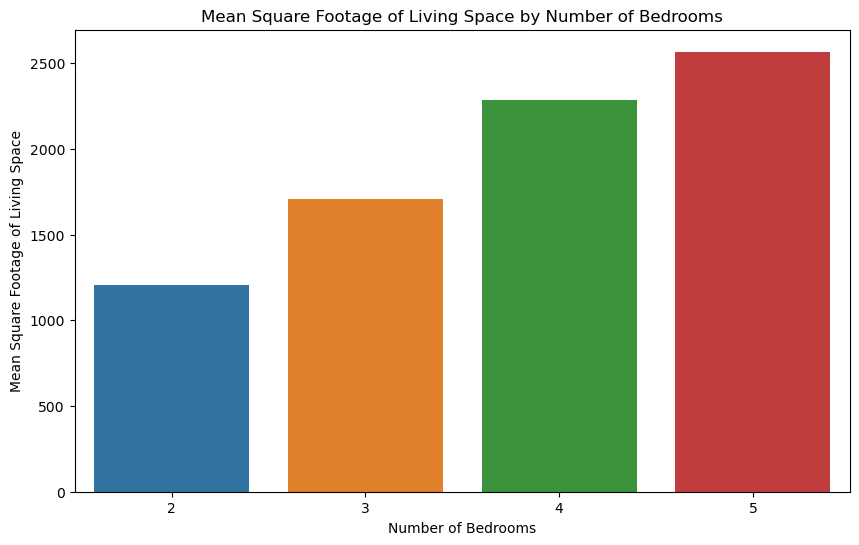

In [30]:
# Plot mean sqft living by bedrooms
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='mean_sqft_living', data=grouped_by_bedrooms)
plt.title('Mean Square Footage of Living Space by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Mean Square Footage of Living Space')
plt.show()